In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

from os.path import expanduser
home = expanduser('~')

def func(x, a, b, c, d):
    return a + b * x + c * x ** 2 + d * x ** 3

In [19]:
def plot_path(stat_file, amplitudes, width, height, label, upper_bound=None, lower_bound=None, 
              xmax=None):

    X_AXIS = '$\\alpha$'
    Y_AXIS = '$\Delta$E (meV/atom)'
    LABEL_FONT = 17
    
    df = pd.read_table(stat_file)
    print(df.keys())

    df['de'] = (df['energy']-df['energy'][lower_bound])*1000/32
    disp = np.array(amplitudes)
    df['disp'] = disp/9

    ## Remove certain rows
    # df = df.drop([1], axis=0)

    YLIMS = [None, None]
    XLIMS = [0   , None]

    fig = plt.figure(figsize=(width,height))


    for kpt in ['']:#, 'R', 'X', 'Z', 'GG']:
        sub_df = df #[df.kpoint == kpt]
        x = sub_df['disp'].to_numpy()[lower_bound:upper_bound]
        y = sub_df['de'].to_numpy()[lower_bound:upper_bound]
        plt.scatter(x, y, color='k', clip_on=False)

        # Fitting to Landau model
        def landau(x, a, b, c):
            return a*x**2 + b*x**4 + c*x**6

        pmodel = Model(landau)
        params = pmodel.make_params(a=-1,b=1, c=1)
        result = pmodel.fit(y, params, x=x)
        #print(result.fit_report())

        if xmax:
            x2 = np.linspace(0, xmax, 100)
        else:
            x2 = np.linspace(0, x.max(), 100)
        y2 = result.eval(x=x2)

#         plt.plot(x2, y2, 'k-', label='Landau fit')

    # Chance font size
    plt.gca().xaxis.label.set_fontsize(LABEL_FONT)
    plt.gca().yaxis.label.set_fontsize(LABEL_FONT)
    plt.gca().tick_params(labelsize=LABEL_FONT)
    # plt.gca().get_yticklabels().fontsize(LABEL_FONT)

    plt.gca().set_axisbelow(True)
    plt.grid(True)
    plt.xlabel(X_AXIS)
    plt.ylabel(Y_AXIS)
    if xmax:
        plt.xlim((0, xmax))
    else:
        plt.xlim((0, max(x)))
    plt.ylim(YLIMS)
#     plt.legend(fancybox=True, ncol=2, framealpha=0.5, fontsize=LABEL_FONT, loc='lower left')#, loc='lower right') 
    # plt.text(0.99, 0.12, "$U_{eff}$ = 3 eV", horizontalalignment='right', verticalalignment='top',\
    #          transform=plt.gca().transAxes,fontsize=LABEL_FONT+2)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.show()

    ## Saving plot
    fig.savefig(f'mod-path-{label}' + '.png', bbox_inches='tight', dpi=500)
#     fig.savefig(f'mod-path-{label}-vec' + '.pdf', bbox_inches='tight')

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


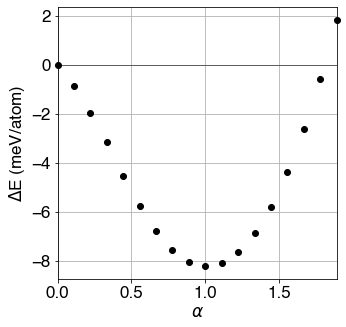

Index(['run_id', 'energy', 'volume', 'mag_s', 'mag_p', 'mag_d', 'mag_tot',
       'point_group', 'lattice'],
      dtype='object')


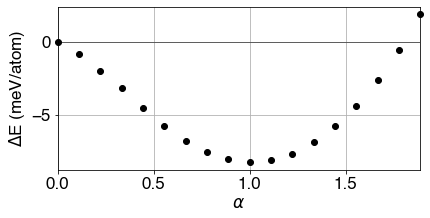

In [20]:
### Ground state surface
infile = home + '/Projects/BaCoS2/correct_mag/M4-path-estruc/stats.tsv'
amplitudes = np.arange(0,19) 
bounds=[0,18]
plot_path(infile, amplitudes, width=5, height=5, label='M4-interp', 
          lower_bound=bounds[0], upper_bound=bounds[1])
plot_path(infile, amplitudes, width=6.5, height=3, label='M4-interp-wide', 
          lower_bound=bounds[0], upper_bound=bounds[1])